In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

In [43]:
import numpy as np
roof = np.random.randint(-10, 10, (305, 1220))
print roof.shape

(305, 1220)


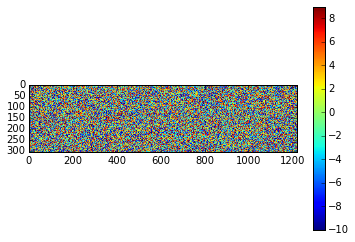

In [44]:
plt.figure()
plt.imshow(roof)
plt.colorbar()
plt.show()

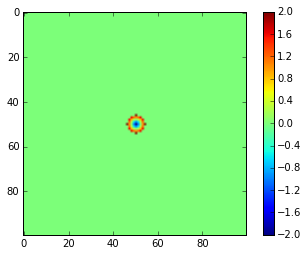

In [31]:
def dinger(d, h, n):
    '''
    Generate ding surface
    d = diameter of ding [unitless]
    h = height of impression in roof [unitless]
    n = size of output: n x n
    output = n x n ding surface
    '''
    x = np.arange(n)
    y = np.arange(n)
    X, Y = np.meshgrid(x,y)
    c = n/2  # Centroid location
    r = h/2  # radius
    Z = np.sqrt( ((X-c)/r)**2 + ((Y-c)/r)**2 )
    Z = Z-h  # Translate surface down by h
    Z[Z>h] = 0 # Truncate
    return Z
    
ding_small = dinger(10, 2, 100)
ding_med = dinger(20, 4, 100)
ding_large = dinger(30, 6, 100)

plt.figure()
plt.imshow(ding_small)
plt.colorbar()
plt.show()

In [27]:
help(p.image)

Help on method Image in module bokeh._glyph_functions:

Image(plot, *args, **kwargs) method of bokeh.plotting.Figure instance
    The image glyph takes each image as a two-dimensional array of scalar data.
    
    A palette (string name of a built-in palette, currently) must also be supplied to use for color-mapping the scalar image.
    
    Args:
        image (str or 2D array_like of float) : value or field names of scalar image data
        x (str or list[float]) : values or field names of lower left `x` coordinates
        y (str or list[float]) : values or field names of lower left `y` coordinates
        dw (str or list[float]) : values or field names of image width distances
        dh (str or list[float]) : values or field names of image height distances
        palette (str or list[str]) : values or field names of palettes to use for color-mapping (see :ref:`bokeh_dot_palettes` for more details)
        color_mapper (LinearColorMapper) : a LinearColorMapper instance
        


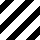
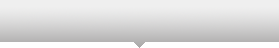
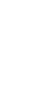
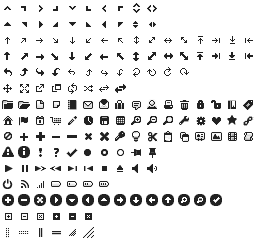
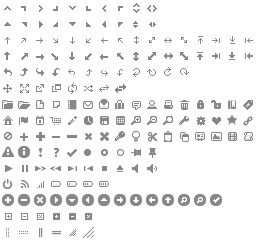
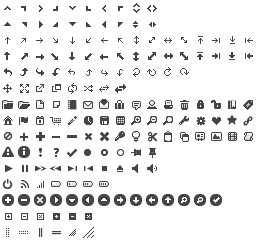
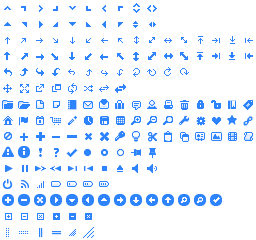
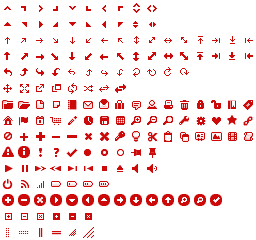
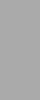
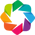
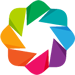
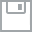
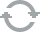
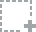
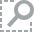
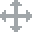
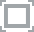
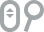

In [38]:
import bokeh.plotting as bok
bok.output_notebook()
p = bok.figure(x_range=[0,100], y_range=[0,100])
p.image(image=[ding_small], x=[0], y=[0], dw=[100], dh=[100], palette="Spectral11")
bok.show(p)

In [ ]:
# Interpolate irregularly spaced data onto a regular grid.
# http://stackoverflow.com/questions/3864899/resampling-irregularly-spaced-data-to-a-regular-grid-in-python

In [48]:
from scipy.signal import correlate

corr_small = correlate(roof, ding_small, 'same')
corr_med = correlate(roof, ding_med, 'same')
corr_large = correlate(roof, ding_large, 'same')

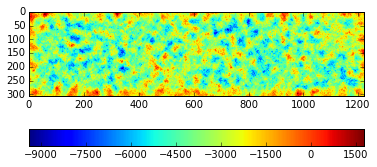

In [72]:
plt.figure()
plt.imshow(corr_large)
plt.colorbar(orientation='horizontal')
plt.show()

In [54]:
p = bok.figure(x_range=[0,1220], y_range=[0,305], width=800, height=200)
p.image(image=[corr_large], x=[0], y=[0], dw=[1220], dh=[305], palette="Spectral11")
bok.show(p)

In [65]:
# Normalized cross correlation
from skimage.feature import match_template

skcorr_small = match_template(roof, ding_small)
skcorr_med = match_template(roof, ding_med)
skcorr_large = match_template(roof, ding_large)

print skcorr_large.shape

(206, 1121)


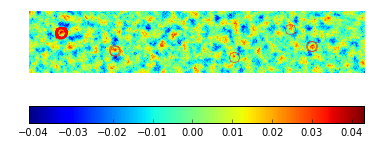

In [104]:
plt.figure()
plt.imshow(skcorr_large)
plt.colorbar(orientation='horizontal')
# Highlight matched regions
ij = np.argwhere(skcorr_large > 0.035)
x = ij[:,0]
y = ij[:,1]
ax = plt.gca()
ax.set_axis_off()
ax.autoscale(False)
ax.plot(y, x, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)
plt.show()

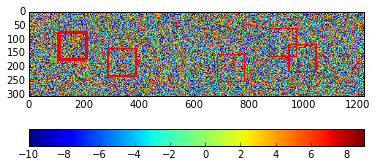

In [98]:
plt.figure()
plt.imshow(roof)
plt.colorbar(orientation='horizontal')
# Highlight matched regions
ij = np.argwhere(skcorr_large > 0.035)
ax = plt.gca()
hding, wding = ding_large.shape
for v in ij:
    x = v[0]
    y = v[1]
    rect = plt.Rectangle((y, x), wding, hding, edgecolor='r', facecolor='none') 
    ax.add_patch(rect)
plt.show()

In [91]:
x


array([70, 71, 72, 72, 73, 73, 73])